## Class activity

In [1]:
import numpy as np
from tensorflow import keras 
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
num_classes = 10
input_shape = (28, 28 , 1)

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [5]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [7]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test , num_classes)

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
        layers.MaxPool2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
        layers.MaxPool2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [13]:
batch_size = 128
epochs = 10

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 11s 6ms/step - loss: 0.3641 - accuracy: 0.8895 - val_loss: 0.0890 - val_accuracy: 0.9758
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.1217 - accuracy: 0.9629 - val_loss: 0.0631 - val_accuracy: 0.9827
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0909 - accuracy: 0.9720 - val_loss: 0.0510 - val_accuracy: 0.9855
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0772 - accuracy: 0.9759 - val_loss: 0.0422 - val_accuracy: 0.9882
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0683 - accuracy: 0.9784 - val_loss: 0.0394 - val_accuracy: 0.9902
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0624 - accuracy: 0.9800 - val_loss: 0.0435 - val_accuracy: 0.9872
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0558 - accuracy: 0.9831 - val_loss: 0.0378 - val_accuracy: 0.9892
Epoch

## Assigment 
- MAX: 10 000 params
- BEST ACCURACY

### Model 1


In [ ]:
# reducing the channels number and changing max pooling to an average one
# with bigger size (3x3), because of the 10 000 params constraint
# average pooling

my_model1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3,3), activation="relu"),
        layers.AveragePooling2D(pool_size=(3,3)),
        layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
        layers.AveragePooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

my_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 average_pooling2d (AverageP  (None, 8, 8, 16)         0         
 ooling2D)                                                       
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 32)          4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 3, 3, 32)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 288)               0         
                                                                 
 dropout_1 (Dropout)         (None, 288)              

In [ ]:
my_model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
my_model1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 13s 5ms/step - loss: 0.8603 - accuracy: 0.7267 - val_loss: 0.2268 - val_accuracy: 0.9418
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3397 - accuracy: 0.8963 - val_loss: 0.1526 - val_accuracy: 0.9602
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2586 - accuracy: 0.9224 - val_loss: 0.1327 - val_accuracy: 0.9627
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2229 - accuracy: 0.9333 - val_loss: 0.1074 - val_accuracy: 0.9725
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2022 - accuracy: 0.9393 - val_loss: 0.1016 - val_accuracy: 0.9733
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1889 - accuracy: 0.9424 - val_loss: 0.0930 - val_accuracy: 0.9752
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1756 - accuracy: 0.9471 - val_loss: 0.0884 - val_accuracy: 0.9770
Epoch

In [ ]:
loss, acc = my_model1.evaluate(X_test, y_test)

print("my_model1 obtained accuracy:", acc)
print("and loss:", loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0484 - accuracy: 0.9854
my_model1 obtained accuracy: 0.9854000210762024
and loss: 0.048365283757448196


### Model 2

In [ ]:
# everything same like before
# except the pooling
# cheking which one is better

my_model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(3,3)),
        layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

my_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 32)          4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 288)               0         
                                                                 
 dropout_2 (Dropout)         (None, 288)              

In [ ]:
my_model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
my_model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 2s 5ms/step - loss: 0.7343 - accuracy: 0.7641 - val_loss: 0.1352 - val_accuracy: 0.9638
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2258 - accuracy: 0.9311 - val_loss: 0.0941 - val_accuracy: 0.9748
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1771 - accuracy: 0.9446 - val_loss: 0.0739 - val_accuracy: 0.9792
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1519 - accuracy: 0.9539 - val_loss: 0.0627 - val_accuracy: 0.9835
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1360 - accuracy: 0.9588 - val_loss: 0.0550 - val_accuracy: 0.9843
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1232 - accuracy: 0.9617 - val_loss: 0.0509 - val_accuracy: 0.9865
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1162 - accuracy: 0.9641 - val_loss: 0.0479 - val_accuracy: 0.9867
Epoch 

In [ ]:
loss, acc = my_model2.evaluate(X_test, y_test)

print("my_model2 obtained accuracy:", acc)
print("and loss:", loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0467 - accuracy: 0.9861
my_model2 obtained accuracy: 0.9861000180244446
and loss: 0.04672865942120552


The results are too simmilar to judge, which pooling is better.

### Model 3

In [11]:
# now more channels with stronger pooling

my_model3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(20, kernel_size=(3,3), activation="relu"),
        layers.MaxPooling2D(pool_size=(4,4)),
        layers.Conv2D(40, kernel_size=(3,3), activation="relu"),
        layers.MaxPool2D(pool_size=(4,4)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

my_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 20)        200       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 20)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 40)          7240      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 40)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 40)                0         
                                                                 
 dropout_2 (Dropout)         (None, 40)               

In [14]:
my_model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
my_model3.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 11s 5ms/step - loss: 1.3136 - accuracy: 0.5721 - val_loss: 0.4285 - val_accuracy: 0.9160
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.6456 - accuracy: 0.7954 - val_loss: 0.2391 - val_accuracy: 0.9495
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.5170 - accuracy: 0.8377 - val_loss: 0.1902 - val_accuracy: 0.9580
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.4561 - accuracy: 0.8565 - val_loss: 0.1515 - val_accuracy: 0.9638
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.4155 - accuracy: 0.8693 - val_loss: 0.1362 - val_accuracy: 0.9690
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3872 - accuracy: 0.8804 - val_loss: 0.1221 - val_accuracy: 0.9708
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3623 - accuracy: 0.8889 - val_loss: 0.1121 - val_accuracy: 0.9700
Epoch

In [15]:
loss, acc = my_model3.evaluate(X_test, y_test)

print("my_model3 obtained accuracy:", acc)
print("and loss:", loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.1064 - accuracy: 0.9700
my_model3 obtained accuracy: 0.9700000286102295
and loss: 0.10640662908554077


### Model 4

In [ ]:
# now more channels with bigger stride

my_model4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(24, kernel_size=(3,3), activation="relu", strides=(2,1)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(48, kernel_size=(3,3), activation="relu", strides=(2,1)),
        layers.MaxPool2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

my_model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 13, 26, 24)        240       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 13, 24)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 2, 11, 48)         10416     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 1, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 240)               0         
                                                                 
 dropout_4 (Dropout)         (None, 240)              

In [ ]:
my_model4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
my_model4.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 0.8444 - accuracy: 0.7342 - val_loss: 0.2307 - val_accuracy: 0.9398
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3614 - accuracy: 0.8890 - val_loss: 0.1626 - val_accuracy: 0.9560
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2881 - accuracy: 0.9126 - val_loss: 0.1346 - val_accuracy: 0.9625
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2550 - accuracy: 0.9231 - val_loss: 0.1174 - val_accuracy: 0.9668
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.2302 - accuracy: 0.9297 - val_loss: 0.1057 - val_accuracy: 0.9715
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.2150 - accuracy: 0.9350 - val_loss: 0.0996 - val_accuracy: 0.9717
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1989 - accuracy: 0.9391 - val_loss: 0.0974 - val_accuracy: 0.9750
Epoch 

In [ ]:
loss, acc = my_model4.evaluate(X_test, y_test)

print("my_model4 obtained accuracy:", acc)
print("and loss:", loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.0899 - accuracy: 0.9728
my_model4 obtained accuracy: 0.9728000164031982
and loss: 0.08988766372203827


### Model 5

In [18]:
# bigger kernel_size
# we have to reduce the layer count by one

my_model5 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(24, kernel_size=(5,5), activation="relu", strides=(3,2)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

my_model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 8, 12, 24)         624       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 6, 24)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                                                                 
 dropout_4 (Dropout)         (None, 576)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                5770      
                                                                 
Total params: 6,394
Trainable params: 6,394
Non-trainable params: 0
____________________________________________________

In [19]:
my_model5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
my_model5.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 2s 4ms/step - loss: 0.8008 - accuracy: 0.7511 - val_loss: 0.2428 - val_accuracy: 0.9423
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3512 - accuracy: 0.8939 - val_loss: 0.1596 - val_accuracy: 0.9605
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.2771 - accuracy: 0.9161 - val_loss: 0.1263 - val_accuracy: 0.9690
Epoch 4/10
422/422 [==============================] - 1s 3ms/step - loss: 0.2403 - accuracy: 0.9267 - val_loss: 0.1110 - val_accuracy: 0.9708
Epoch 5/10
422/422 [==============================] - 1s 3ms/step - loss: 0.2126 - accuracy: 0.9355 - val_loss: 0.0990 - val_accuracy: 0.9747
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1972 - accuracy: 0.9384 - val_loss: 0.0913 - val_accuracy: 0.9763
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.1903 - accuracy: 0.9410 - val_loss: 0.0878 - val_accuracy: 0.9773
Epoch 

In [20]:
loss, acc = my_model5.evaluate(X_test, y_test)

print("my_model5 obtained accuracy:", acc)
print("and loss:", loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9754
my_model5 obtained accuracy: 0.9753999710083008
and loss: 0.08420082926750183


### Model 6

In [21]:
# bigger kernel_size and two layers

my_model6 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(24, kernel_size=(4,4), activation="relu", strides=(3,3)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(24, kernel_size=(4,4), activation="relu", strides=(3,3)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
)

my_model6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 9, 9, 24)          408       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 24)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 1, 1, 24)          9240      
                                                                 
 flatten_5 (Flatten)         (None, 24)                0         
                                                                 
 dropout_5 (Dropout)         (None, 24)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                250       
                                                      

In [22]:
my_model6.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
my_model6.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 2s 5ms/step - loss: 1.2047 - accuracy: 0.5831 - val_loss: 0.3809 - val_accuracy: 0.9152
Epoch 2/10
422/422 [==============================] - 2s 4ms/step - loss: 0.7264 - accuracy: 0.7411 - val_loss: 0.2462 - val_accuracy: 0.9428
Epoch 3/10
422/422 [==============================] - 2s 4ms/step - loss: 0.6245 - accuracy: 0.7733 - val_loss: 0.1857 - val_accuracy: 0.9553
Epoch 4/10
422/422 [==============================] - 2s 4ms/step - loss: 0.5742 - accuracy: 0.7910 - val_loss: 0.1606 - val_accuracy: 0.9592
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.5403 - accuracy: 0.8035 - val_loss: 0.1500 - val_accuracy: 0.9602
Epoch 6/10
422/422 [==============================] - 2s 4ms/step - loss: 0.5181 - accuracy: 0.8092 - val_loss: 0.1325 - val_accuracy: 0.9623
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.5127 - accuracy: 0.8141 - val_loss: 0.1357 - val_accuracy: 0.9638
Epoch 

In [23]:
loss, acc = my_model5.evaluate(X_test, y_test)

print("my_model6 obtained accuracy:", acc)
print("and loss:", loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9754
my_model6 obtained accuracy: 0.9753999710083008
and loss: 0.08420082926750183


Even here, having just around 6300 parameters we obtain good results. Just a have of percent lower than in the best model so far. There is a more significant change in the loss function, which value for the test set is almost two times bigger.

## Analysis of a model
I have choosen the first one, but every is working with simmilar accuracy, so others could have been chosen.

In [ ]:
y_pred = my_model1.predict(X_test)

313/313 [==============================] - 1s 2ms/step


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


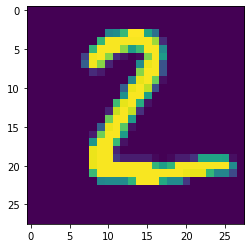

In [ ]:
np.argmax(y_pred[0])
plt.imshow(X_test[1].reshape(28,28))
print(y_test[1])

In [ ]:
y_pred_digit = np.array([np.argmax(x) for x in y_pred])
y_test_digit = np.array([np.argmax(x) for x in y_test])

In [ ]:
indecies_of_wrongly_predicted = np.where((y_pred_digit != y_test_digit) == True)

In [ ]:
y_wrongly_predicted = y_pred_digit[indecies_of_wrongly_predicted]

In [ ]:
wrongly_predicted = X_train[indecies_of_wrongly_predicted]

In [ ]:
wrongly_predicted.shape

(220, 28, 28, 1)

Text(0.5, 1.0, 'Predicted: 1')

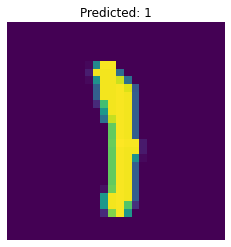

In [ ]:
i = 93

plt.imshow(wrongly_predicted[i].reshape(28,28))
plt.axis('off')
plt.title(f"Predicted: {y_wrongly_predicted[i]}")

I would also classify this as a 1...

Text(0.5, 1.0, 'Predicted: 9')

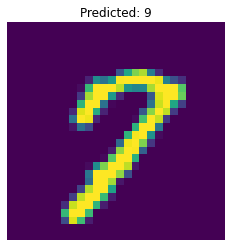

In [ ]:
i = 78

plt.imshow(wrongly_predicted[i].reshape(28,28))
plt.axis('off')
plt.title(f"Predicted: {y_wrongly_predicted[i]}")

This one is not an easy one as well

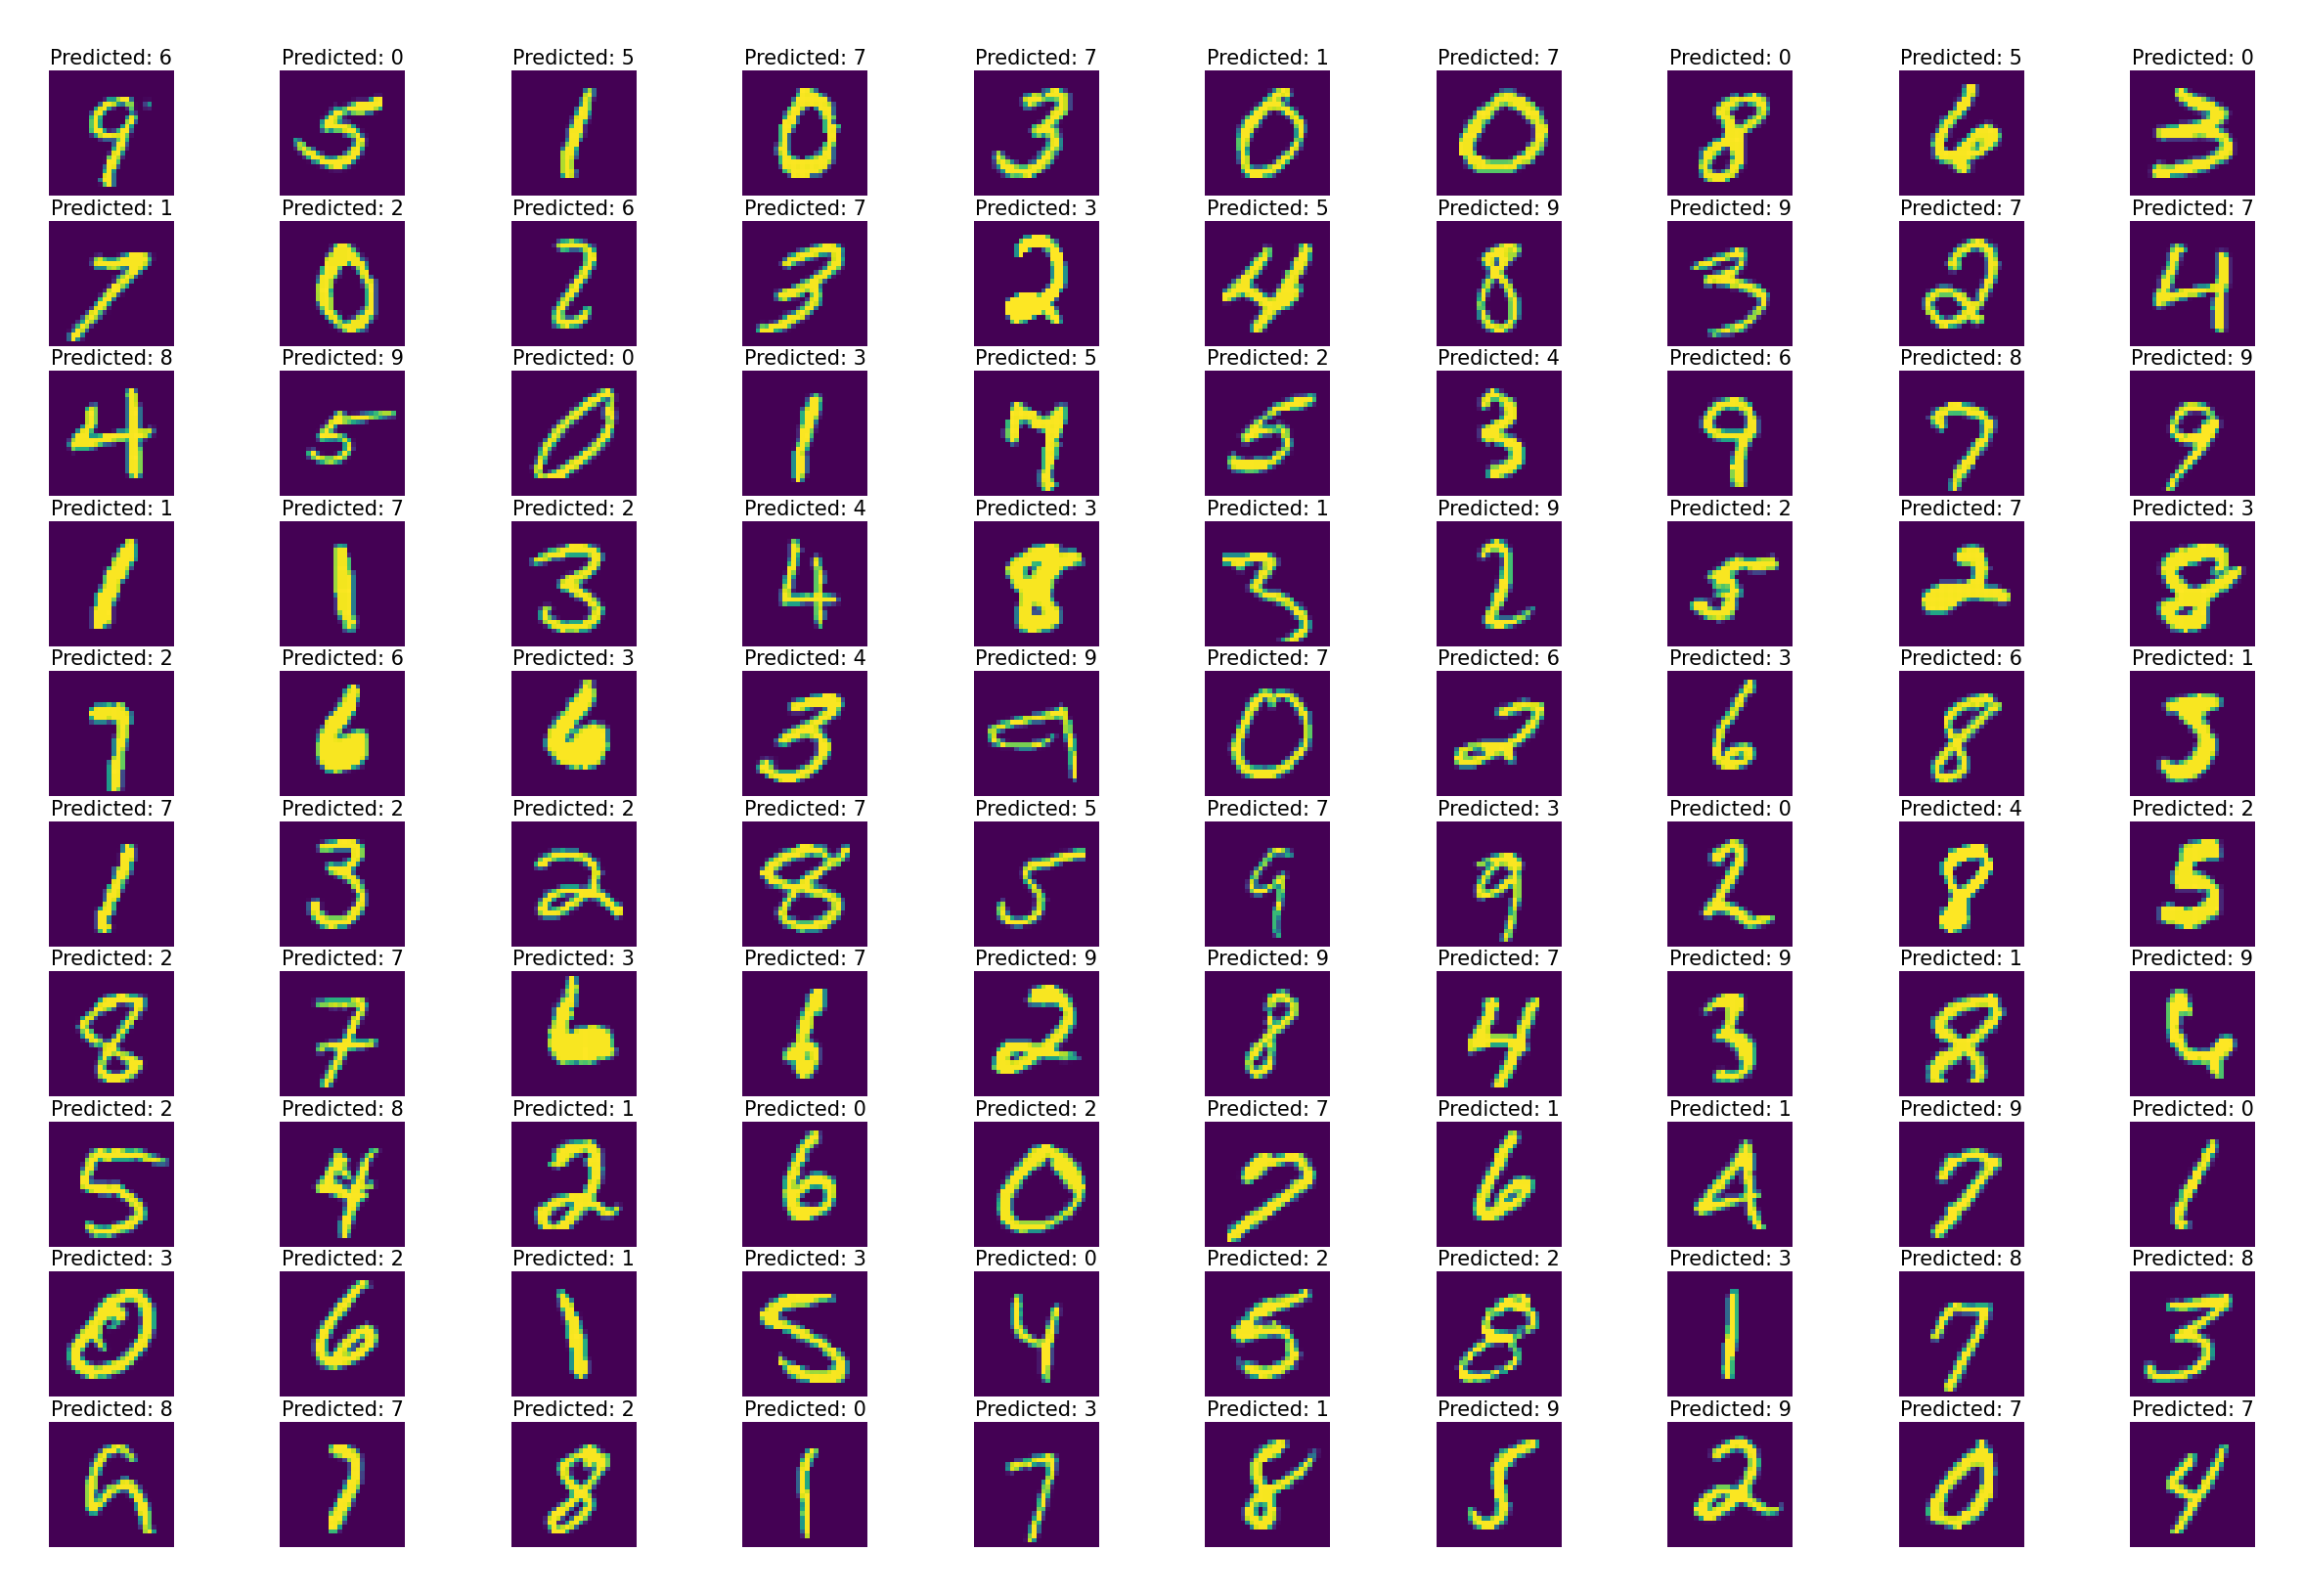

In [ ]:
n = 10
fig, axs = plt.subplots(n, n) 

fig.set_dpi(n*50)

for i in range(n):
  for j in range(n):
    axs[i, j].imshow(wrongly_predicted[i*n+j].reshape(28,28))
    axs[i, j].axis('off')
    axs[i, j].set_title(f"Predicted: {y_wrongly_predicted[i*n+j]}", {'fontsize': 3}, pad=1)


As we see here some of the digits are written very messy.

Text(0.5, 1.0, 'Predicted: 1')

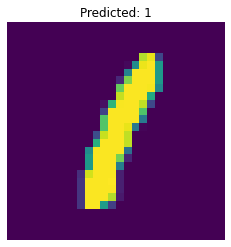

In [ ]:
i = 30

plt.imshow(wrongly_predicted[i].reshape(28,28))
plt.axis('off')
plt.title(f"Predicted: {y_wrongly_predicted[i]}")

Again in my opinion well asigned.

### Summary
In all those examples, we obtained around 98% accuracy on the test set, which is satisfying result. The best models are the two first ones. As we can see on the plots, the digit aren't always easy to read, even by the human eye, so it might be impossible to obtain even higher accuracy.

Also, [MNIST is said to be too easy](https://www.ttested.com/ditch-mnist), even for standard dense NN, so for CNN, which deals with images flawlessly, the 10 000 params constraint is not a problem at all.